## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [79]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [80]:
df = pd.read_csv('data/data.csv')

#### Show Top 5 Records

In [59]:
df.head()

,District,Year,Age,Gender,Tobacco_Use,Alcohol_Use,Hypertension,Diabetes,Aging_Population,Obese(%),...,PM2.5,NO2,SO2,Population_Density,SES_Income,Healthcare_Access,Sleep_Hours,Urban_or_Rural,NDVI,Disease_NCD
0,Sukma,2020,44,Male,Yes,Yes,Yes,No,No,8.6,...,60.7,24.0,7.4,814,Low,Poor,7.7,Rural,0.629,CVD
1,Shajapur,2021,44,Female,No,No,No,Yes,No,22.3,...,65.9,25.9,13.2,1489,Medium,Moderate,7.2,Rural,0.347,Stroke
2,Goalpara,2021,52,Male,Yes,Yes,Yes,Yes,No,19.4,...,83.1,35.2,19.5,1473,Low,Moderate,7.4,Rural,0.100,CVD
3,Bastar,2021,45,Male,Yes,Yes,Yes,No,No,14.8,...,76.5,27.4,14.0,1483,Low,Poor,7.6,Rural,0.100,CVD
4,Kutch,2021,57,Male,No,No,Yes,Yes,No,20.6,...,37.5,19.1,7.0,833,Low,Poor,7.1,Rural,0.709,CVD


In [81]:
X = df.drop(columns=['Disease_NCD'],axis=1)

In [82]:
X.head()

,District,Year,Age,Gender,Tobacco_Use,Alcohol_Use,Hypertension,Diabetes,Aging_Population,Obese(%),Cholesterol(%),PM2.5,NO2,SO2,Population_Density,SES_Income,Healthcare_Access,Sleep_Hours,Urban_or_Rural,NDVI
0,Sukma,2020,44,Male,Yes,Yes,Yes,No,No,8.6,14.3,60.7,24.0,7.4,814,Low,Poor,7.7,Rural,0.629
1,Shajapur,2021,44,Female,No,No,No,Yes,No,22.3,14.7,65.9,25.9,13.2,1489,Medium,Moderate,7.2,Rural,0.347
2,Goalpara,2021,52,Male,Yes,Yes,Yes,Yes,No,19.4,32.5,83.1,35.2,19.5,1473,Low,Moderate,7.4,Rural,0.100
3,Bastar,2021,45,Male,Yes,Yes,Yes,No,No,14.8,18.3,76.5,27.4,14.0,1483,Low,Poor,7.6,Rural,0.100
4,Kutch,2021,57,Male,No,No,Yes,Yes,No,20.6,38.8,37.5,19.1,7.0,833,Low,Poor,7.1,Rural,0.709


In [83]:
y = df['Disease_NCD']

In [84]:
y

0           CVD
1        Stroke
2           CVD
3           CVD
4           CVD
          ...  
19727       CVD
19728       CVD
19729       NaN
19730       CVD
19731       CVD
Name: Disease_NCD, Length: 19732, dtype: object

In [85]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [86]:
X = preprocessor.fit_transform(X)

In [87]:
X.shape

(19732, 427)

In [88]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((15785, 427), (3947, 427))

#### Create an Evaluate Function to give all metrics after model Training

In [89]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [90]:
import numpy as np

print(np.isnan(X_train.data).sum())
print(np.isnan(X_test.data).sum())
print(y_train.isna().sum())
print(y_test.isna().sum())


0
0
410
129


In [91]:
import pandas as pd
from scipy.sparse import csr_matrix

# Convert sparse matrix to pandas DataFrame
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test)

# Store original indices before dropping NA
train_original_indices = X_train_df.index
test_original_indices = X_test_df.index

# Drop NA rows in X
X_train_df = X_train_df.dropna()
X_test_df = X_test_df.dropna()

# Get the indices that were kept after dropping NA
train_kept_indices = X_train_df.index
test_kept_indices = X_test_df.index

# Align y with the kept indices
y_train = y_train.iloc[train_kept_indices]
y_test = y_test.iloc[test_kept_indices]

# Reset index so both X and y match properly
X_train_df = X_train_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test_df = X_test_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [93]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(15785, 427) (15785,)
(3947, 427) (3947,)


In [94]:
import pandas as pd
from scipy.sparse import csr_matrix

# Convert to DataFrame first
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test)

# Combine X and y so dropna removes both together
train_df = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)

# Drop rows with NaN from both X and y
train_df = train_df.dropna()
test_df = test_df.dropna()

# Separate back into X and y
X_train_df = train_df.drop(columns=[y_train.name])
y_train = train_df[y_train.name]

X_test_df = test_df.drop(columns=[y_test.name])
y_test = test_df[y_test.name]

# (Optional) Convert back to sparse
X_train = csr_matrix(X_train_df)
X_test = csr_matrix(X_test_df)


In [95]:
import numpy as np

print(np.isnan(X_train.data).sum())
print(np.isnan(X_test.data).sum())
print(y_train.isna().sum())
print(y_test.isna().sum())

0
0
0
0


In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit on full target data (train + test) to ensure consistency
y_all = pd.concat([y_train, y_test])
le.fit(y_all)

# Transform separately
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print("Classes:", le.classes_)


Classes: ['Breast_Cancer' 'CVD' 'Liver_Cancer' 'Lung_Cancer' 'Stroke']


In [110]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ==============================
# Models
# ==============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

# ==============================
# Train & Evaluate Function
# ==============================
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return acc, prec, rec, f1

# ==============================
# Training Loop
# ==============================
model_list = []
acc_list = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # train model
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    train_acc, train_prec, train_rec, train_f1 = evaluate_model(y_train, y_train_pred)
    test_acc, test_prec, test_rec, test_f1 = evaluate_model(y_test, y_test_pred)
    
    print(f"\n{name}")
    print("Training Performance:")
    print(f"- Accuracy:  {train_acc:.4f}")
    print(f"- Precision: {train_prec:.4f}")
    print(f"- Recall:    {train_rec:.4f}")
    print(f"- F1 Score:  {train_f1:.4f}")
    
    print("\nTest Performance:")
    print(f"- Accuracy:  {test_acc:.4f}")
    print(f"- Precision: {test_prec:.4f}")
    print(f"- Recall:    {test_rec:.4f}")
    print(f"- F1 Score:  {test_f1:.4f}")
    
    print("="*40)
    
    # Save results
    model_list.append(name)
    acc_list.append(test_acc)

# ==============================
# Summary Table
# ==============================
results_df = pd.DataFrame({
    "Model": model_list,
    "Test Accuracy": acc_list
})

print("\n\n===== Model Comparison =====")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


Training Logistic Regression...

Logistic Regression
Training Performance:
- Accuracy:  0.9274
- Precision: 0.9224
- Recall:    0.9274
- F1 Score:  0.9202

Test Performance:
- Accuracy:  0.9193
- Precision: 0.9104
- Recall:    0.9193
- F1 Score:  0.9127
Training K-Neighbors Classifier...

K-Neighbors Classifier
Training Performance:
- Accuracy:  0.9272
- Precision: 0.9204
- Recall:    0.9272
- F1 Score:  0.9199

Test Performance:
- Accuracy:  0.8997
- Precision: 0.8904
- Recall:    0.8997
- F1 Score:  0.8936
Training Decision Tree...

Decision Tree
Training Performance:
- Accuracy:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- F1 Score:  1.0000

Test Performance:
- Accuracy:  0.8976
- Precision: 0.9020
- Recall:    0.8976
- F1 Score:  0.8997
Training Random Forest...

Random Forest
Training Performance:
- Accuracy:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- F1 Score:  1.0000

Test Performance:
- Accuracy:  0.9178
- Precision: 0.9037
- Recall:    0.9178
- F1 Score:  0.9094
Tr

c:\Users\dronm\OneDrive\Desktop\minor\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [22:39:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBClassifier
Training Performance:
- Accuracy:  0.9819
- Precision: 0.9817
- Recall:    0.9819
- F1 Score:  0.9816

Test Performance:
- Accuracy:  0.9193
- Precision: 0.9094
- Recall:    0.9193
- F1 Score:  0.9136
Training CatBoostClassifier...

CatBoostClassifier
Training Performance:
- Accuracy:  0.9535
- Precision: 0.9536
- Recall:    0.9535
- F1 Score:  0.9497

Test Performance:
- Accuracy:  0.9170
- Precision: 0.9082
- Recall:    0.9170
- F1 Score:  0.9108
Training AdaBoost Classifier...

AdaBoost Classifier
Training Performance:
- Accuracy:  0.9050
- Precision: 0.8865
- Recall:    0.9050
- F1 Score:  0.8930

Test Performance:
- Accuracy:  0.9013
- Precision: 0.8861
- Recall:    0.9013
- F1 Score:  0.8906


===== Model Comparison =====
                    Model  Test Accuracy
0     Logistic Regression       0.919329
4           XGBClassifier       0.919329
3           Random Forest       0.917758
5      CatBoostClassifier       0.916972
6     AdaBoost Classifier       0.901257
1

### Results

In [111]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score


## Linear Regression

In [112]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 37.18


## Plot y_pred and y_test

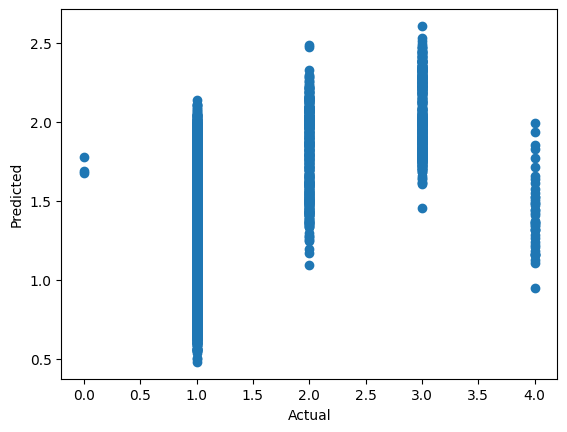

In [113]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

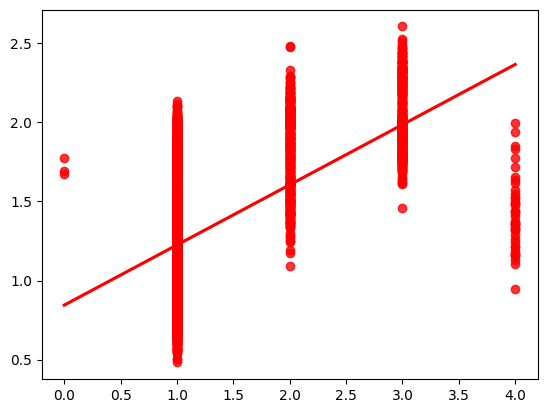

In [114]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [115]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,1,0.653737,0.346263
1,2,1.969860,0.030140
2,1,0.903778,0.096222
3,3,1.787199,1.212801
4,1,0.779130,0.220870
...,...,...,...
3813,1,1.215600,-0.215600
3814,1,1.201827,-0.201827
3815,1,0.771583,0.228417
3816,2,1.413043,0.586957
